# Исследование объявлений о продаже квартир.

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [152]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #прочитаем csv-файл и сохраним в переменную data
data.head(10) #выведем первые 10 строк датафрейма data на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Изучим общую информацию о полученном датафрейме методом info() и используем метод describe( ) для получения сводки числовых значений в вашем наборе данных:**

In [153]:
data.info()
data.describe().round()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,10.0,6541549.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,28794.0,14191.0,1.0,491.0,1.0,518.0,181.0
std,6.0,10887013.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12631.0,8608.0,1.0,342.0,1.0,278.0,220.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,1.0,26726.0,13098.0,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


**Построим общую гистограмму для всех столбцов таблицы:**

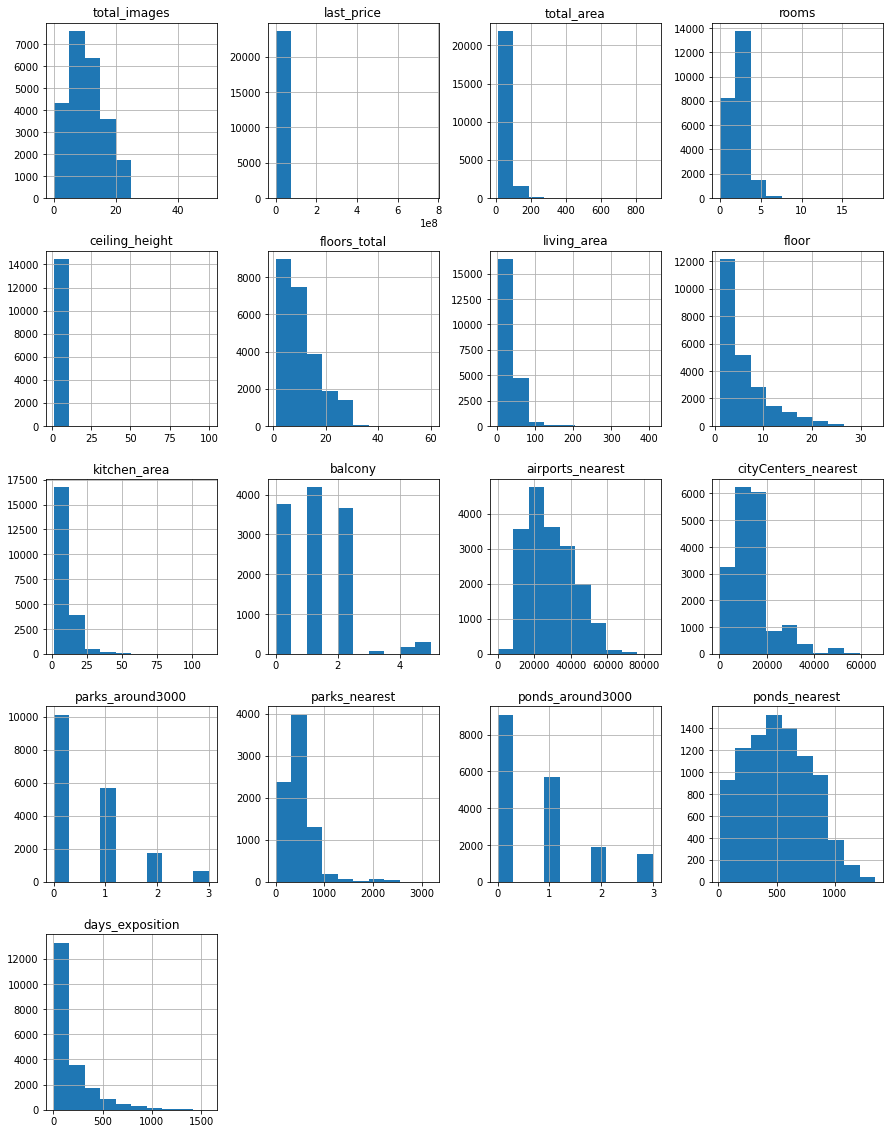

In [154]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**

Изучив общую информацию в датафрейме, мы видим несколько проблем в исходных данных, а именно: 

- пропущенные значения в большинстве столбцов;
- некорректный тип данных в некоторых столбцах
- присутсвуют аномальные значения, которые могут исказить результаты исследования 

Подробно на этих проблемах оставновимся в разделе по предобработке данных, выясним причины их возникновения и обработаем там, где это будет корректно сделать и в зависимости от наших дальнейших задач.

### Предобработка данных.

#### Удаление пропусков.

In [155]:
data.isna().sum() #Выведем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Найдены пропуски во многих столбцах. Что мы будем с ними делать?**

*Заменим медианным значением пропуски в следующих столбцах:*
- ceiling_height - высота потолков (м) 
- living_area - жилая площадь в квадратных метрах (м²)
- kitchen_area -  площадь кухни в квадратных метрах (м²)
- cityCenters_nearest - расстояние до центра города (м

*Заменим пропущенные значения на 0:*
- balcony - число балконов (если продавец не указал число балконов, то, скорее всего, в его квартире их нет)

*Удалим строки с пропущенными значениями:*
- locality_name - название населённого пункта
- floors_total - всего этажей в доме

*Заменим пропушенные значения на False:*
- is_apartment - апартаменты (булев тип)

*Оставим без изменений:*                                       
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)                      
- parks_nearest - расстояние до ближайшего парка (м)                
- ponds_nearest - расстояние до ближайшего водоёма (м)          
- days_exposition - сколько дней было размещено объявление 
- parks_around3000 - число парков в радиусе 3 км
- ponds_around3000 - число водоёмов в радиусе 3 км


*Пропуски в столбце ceiling_height заменим на медианное значение по всему датасету после обработки аномальных значений, так как в данном столбце почти половина пропусков и если мы их заменим на медианное значение до удаления выбросов, это может исказить наши данные.*

**Жилая площадь объекта недвижимости в большей степени зависит от количества комнат, поэтому заполнять пропуски в столбце living_area мы будем медианным значением по каждому типу из столбца rooms.**

In [156]:
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == d), 'living_area'].median()


**Несмотря на то, что площадь кухни не всегда зависит от количества комнат, у нас есть объекты свободной планировки и студии, поэтому медианное значение kitchen_area тоже будем рассчитывать по каждому типу из столбца rooms и заполнять им пропущенные значения. Оставшиеся пропуски в объектах, где кухня не предусмотрена, как отдельное помещение (студия, свободная планировка), заменим на 0.**

In [157]:
for a in data['rooms'].unique():
    data.loc[(data['rooms'] == a) & (data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['rooms'] == a), 'kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(0)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Пропуски в столбце cityCenters_nearest заполним медианой по населенным пунктам, разделив значения на Санкт-Петербургу и другим населенным пунктам.**

In [158]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}) #приведем название столбца к змеиному регистру
def city_name(row): #с помощью функции разделим все значения на те, что по Санкт-Петербургу и на "другое"
    if row['locality_name'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'другой'
data['city_name'] = data.apply(city_name, axis=1) #добавим новый столбец 
for с in data['city_name'].unique(): #пропуски  в столбце city_centers_nearest заменим медианой по каждому типу из нового столбца city_name
    data.loc[(data['city_name'] == с) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = data.loc[(data['city_name'] == с), 'city_centers_nearest'].median()
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,другой
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,45.00,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,NaN,городской посёлок Янино-1,NaN,30308.5,NaN,NaN,NaN,NaN,55.0,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,NaN,посёлок Мурино,NaN,30308.5,NaN,NaN,NaN,NaN,189.0,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


In [159]:
#Заменим пропущенные значения balcony на 0
data['balcony'] = data['balcony'].fillna(0)

#Пропуски в столбцах locality_name и floors_total малочсленны и поэтому удаление данных строк не повлияет на наши данные
data.dropna(subset=['locality_name', 'floors_total'], inplace=True) 

#Пропущенные значения в столбце is_apartment заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

Для того, чтобы понять что делать с пропусками в столбце days_exposition , необходимо понять, есть ли какая-то закономерность в них. Исследуем, как они распределены относительно даты публикации объявления.

<AxesSubplot:xlabel='first_day_exposition'>

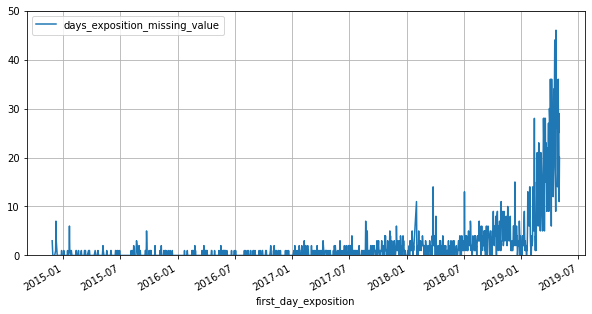

In [160]:
#Для начала переведем данные в столбце first_day_exposition из строкового типа в datetime64
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#создадим столбец с булевым значением, где True=пропуск
data['days_exposition_missing_value'] = data['days_exposition'].isna()

#с помощью сводной таблицы построим график, отображающий распределение пропусков по дате                                             
(data
    .pivot_table(index='first_day_exposition', values='days_exposition_missing_value',aggfunc='sum')
    .sort_values(by='days_exposition_missing_value')
    .plot(ylim=(0,50), grid=True, figsize=(10,5))
)

Мы видим, что количество пропусков резко возрасло в 2019 году, с чем это связано мы точно сказать не можем, поэтому заполнять пропуски не будем.

**Вывод**

Пропуски в данных могли возникнуть в результате того, что продавец некорректно указал информацию или оставил поле для заполнения пустым (например, если нет балкона, вместо 0 был пропуск). Также данные могли быть выгружены некорректно (например, такая ошибка могла возникнуть в столбцах с картографическими данными, которые выгружаются автоматически).
Еще одной причиной появления пропусков могли стать изменения в сервисе Яндекс-недвижимость, которые привели к резкому увеличению пропусков в столбце days_exposition, начиная с 2019 года.

#### Изменение типов данных.

In [161]:
#Заменим вещественный тип данных в столбцах last_price, floors_total, balcony на целочисленный с помощью метода astype()
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

#Переведем данные в столбце is_apartment из строкового типа в bool
data['is_apartment'] = data['is_apartment'].astype('bool')

В предыдущем разделе мы привели дату к правильному формату datetime64 для корректного отображения информации на графике. Также изменили тип данных, где это возможно сделать, чтобы в наших дальнейших расчетах не возникало ошибок. 

#### Обработка дубликатов.

Изучим уникальные значения в столбце с названиями locality_name и устраним неявные дубликаты.

In [162]:
#выведем перечень уникальных значений столбца locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Мы видим, что чаще всего дубликаты связаны с буковой 'ё' и 'е', поэтому переименуем посёлки в поселки методом replace( ), объединим городские поселки и поселки городского типа, так как это одно и то же. Мурино и Кудрово являются городами, поэтому 'поселок' и 'деревня' применять некорректно, эти дубликаты так же уберем и оставим только названия городов. Поселок Рябово и деревню Фёдоровское сделаем поселками городского типа, тем самым убрав дубликаты.

In [163]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')    
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].str.replace('деревня Фёдоровское', 'поселок городского типа Фёдоровское')

In [164]:
#проверяем, от всех ли дубликатов мы избавились
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

#### Обработка аномальных значений.

В некоторых столбцах в наших данных встречаются аномальные значения, то есть выбросы. Изменим их там, где нам понятна природа их происхождения или удалим, где это требуется.

In [165]:
data.describe() #еще раз посмотрим все столбцы и выделим те, которые необходимо отработать

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,23565.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.324580,5.878124,10.372721,0.593677,28797.082701,17908.735731,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,21.721222,4.871485,5.719951,0.960660,12632.499735,10150.876277,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.400000,2.000000,7.200000,0.000000,18565.000000,10935.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26757.000000,14958.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.700000,8.000000,11.500000,1.000000,37273.000000,30308.500000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выделим важные для нашего исследования параметры, где видны аномальные значения:

- ceiling_height (высота потолков)
- last_price (стоимость объекта)
- total_area (общая площад квартиры)
- rooms (количество комнат)
- floors_total (количество этажей в доме)
- living_area (жилая площадь)
- kitchen_area (площадь кухни)

**Высота потолков**

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

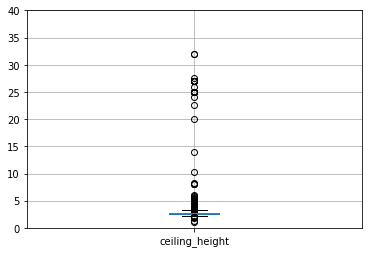

In [166]:
data.boxplot(column='ceiling_height') #построим диаграмму размаха методом boxplot()
plt.ylim(0,40)
data['ceiling_height'].sort_values().unique() #отстортируем все значения в порядке возрастания

На графике мы видим, что значения до 2 м и выше 6 м (да, в Санкт-Петербурге есть дома дореволюционной постройки и сталинки с высокими потолками, поэтому не стоит удалять значения от 4 до 6 м) являются выбросами. Можем предположить, что значения от 22 до 32 м - это вещественные значения: 2.2: м и 3.2 м, преобразуем их с помощью цикла. Происхождение значений до 2 и выше 32, а также от 6 до 20 - нам неизвестны, поэтому строки с этими значениями мы удалим. После преобразований заменим пропуски на медианное значение.

In [167]:
for h in data['ceiling_height']: #с помощью цикла пройдемся по всем значениям столбца ceiling_height 
    if h > 20:
        data['ceiling_height'] = data['ceiling_height'].replace(h, h/10) #и поделим на 10 все значения больше 20
data = data.query('2 < ceiling_height <= 6 or ceiling_height.isna()') #оставим только значения от 2 до 6 м и пропуски
ceiling_height_median = data['ceiling_height'].median() 
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median) #заменим пропуски на медиану
data['ceiling_height'].sort_values().unique() #проверим, какие значения остались

array([2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

**Полная стоимость объекта**

In [168]:
data['last_price'].describe().round() #Посмотрим, что у нас с ценами в столбце last_price с помощью метода describe()

count        23543.0
mean       6541974.0
std       10915366.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

<AxesSubplot:>

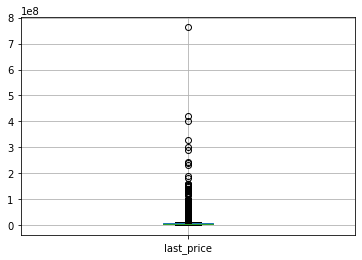

In [169]:
data.boxplot(column='last_price') #построим диаграмму размаха по всем ценам в столбце last_price

Не очень наглядно. Видно, что есть выбросы, и многие почти до 400 миллионов, один выброс на максимальном расстоянии от остальных- 763 млн. Чтобы лучше разглядеть «ящик с усами», изменим масштаб графика.

(-100000.0, 15000000.0)

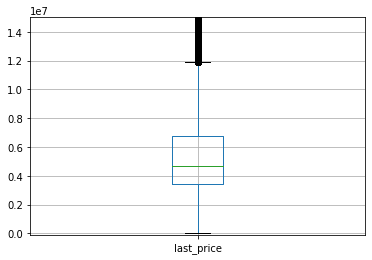

In [170]:
data.boxplot(column='last_price')
plt.ylim(-100000,15000000)

На диаграмме видно, что нижняя граница около нуля, верхняя на уровне 12 млн. 
В Санкт-Петербурге есть квартиры за 200, 300, 400 млн, но в данной ценовой категории квартиры редко появляются в продаже,корректно будет удалить их, как выбросы. 
Что касается нижней границы по стоимости, посмотрим на нее, сделав срез по объектам до 500 тыс.

In [171]:
min_price = data.query('last_price < 500000')
min_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name,days_exposition_missing_value
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,поселок городского типа Будогощь,NaN,30308.5,NaN,NaN,NaN,NaN,233.0,другой,False
6859,6,490000,40.0,2017-12-11,1,2.65,5,17.6,3,False,...,деревня Старополье,NaN,30308.5,NaN,NaN,NaN,NaN,43.0,другой,False
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург,False
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,деревня Старополье,NaN,30308.5,NaN,NaN,NaN,NaN,96.0,другой,False
10782,3,490000,29.1,2016-05-05,1,2.50,5,17.0,5,False,...,Сланцы,NaN,30308.5,NaN,NaN,NaN,NaN,719.0,другой,False
14911,5,430000,54.0,2018-06-26,2,2.65,3,30.5,3,False,...,поселок станции Свирь,NaN,30308.5,NaN,NaN,NaN,NaN,44.0,другой,False
16032,8,480000,32.0,2019-01-06,1,2.65,2,16.0,1,False,...,Сланцы,NaN,30308.5,NaN,NaN,NaN,NaN,83.0,другой,False
16219,14,450000,38.5,2018-07-11,2,2.65,2,30.5,1,False,...,деревня Вахнова Кара,NaN,30308.5,NaN,NaN,NaN,NaN,45.0,другой,False
16274,18,440000,40.0,2018-07-10,1,2.65,5,17.6,1,False,...,деревня Старополье,NaN,30308.5,NaN,NaN,NaN,NaN,45.0,другой,False
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,Сланцы,NaN,30308.5,NaN,NaN,NaN,NaN,NaN,другой,True


Самые дешевые объекты недвижимости находятся в деревнях и поселках и стоят от 430 тыс. 
Однако, один объект имеет аномальное значение - квартира в Санкт-Петербурге за 12190 руб, скорее всего стоимость указана с ошибкой, это 12190 тыс. Приведем к корректному виду.

In [172]:
data = data.drop(data[data['last_price'] >= 200000000].index) #удаляем строки со стоимостью объекта выше 200 млн
data['last_price'] = data['last_price'].replace(12190, 12190000) #заменяем цену квартиры за 12 тыс на 12 млн
data['last_price'].describe().round() #проверим, что получилось

count        23534.0
mean       6408232.0
std        7912957.0
min         430000.0
25%        3400000.0
50%        4645000.0
75%        6790000.0
max      190870000.0
Name: last_price, dtype: float64

**Количество комнат**

count    23534.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

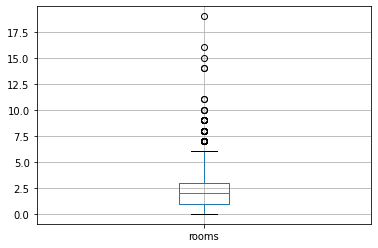

In [173]:
data.boxplot(column='rooms') #Посмотрим, что у нас с аномальными значениями в столбце rooms
data['rooms'].describe().round()

Количество комнат варьируется от 0 до 19. Уберем аномально большие квартиры, где больше 10 комнат, из нашего исследования.

<AxesSubplot:>

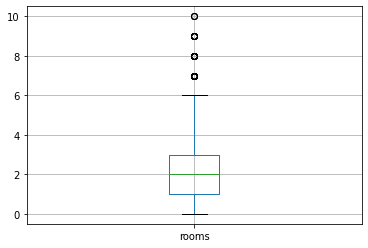

In [174]:
data = data.drop(data[data['rooms'] > 10].index)
data.boxplot(column='rooms')

**Общая площадь квартиры**

count    23527.0
mean        60.0
std         34.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        631.0
Name: total_area, dtype: float64

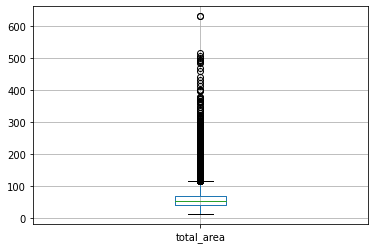

In [175]:
data.boxplot(column='total_area') #Проверим, какие у нас остались квартиры по общей площади total_area, также построив диаграмму размаха
data['total_area'].describe().round()

Площадь квартир варьируется от 12 до 631 м. Квартиры больше 110 м мы можем считать выбросами, но удалим строки только с очень большими квартирами от 300 м.

In [176]:
data = data.drop(data[data['total_area'] > 300].index)
data['total_area'].describe().round()

count    23475.0
mean        59.0
std         30.0
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        300.0
Name: total_area, dtype: float64

**Количество этажей**

count    23475.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

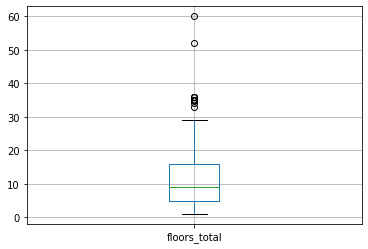

In [177]:
data.boxplot(column='floors_total') #т.к. в нашем исследовании мы будем использовать этажность дома, посмотрим есть ли аномальные значения в столбце floors_total
data['floors_total'].describe().round()

Самый высокий жилой дом в Санкт-Петерурге имеет 37 этажей, мы видим значения выше 50 этажа, но не знаем характер происхождения данной аномалии, удалим эти строки.

In [178]:
data = data.drop(data[data['floors_total'] > 40].index)
data['floors_total'].describe().round()

count    23473.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64

**Площадь кухни**

In [179]:
data['kitchen_area'].describe()

count    23473.000000
mean        10.309821
std          5.493909
min          0.000000
25%          7.200000
50%          9.040000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

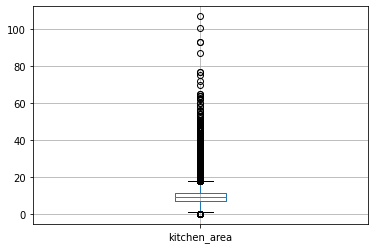

In [180]:
data.boxplot(column='kitchen_area') #построим диаграмму размаха по площади кухни

Площадь кухни варьируется от 0 (в квартирах - студиях и в квартирах свободной планировки) до 107 м². 
Мы видим, что в большинстве случаев площадь кухни не превышает 20 м². 
Удалим из нашего исследования квартиры со слишком большой площадью от 50 м².

In [181]:
data = data.drop(data[data['kitchen_area'] > 50].index)

**Жилая площадь квартиры**

count    23437.0
mean        34.0
std         19.0
min          2.0
25%         18.0
50%         30.0
75%         42.0
max        250.0
Name: living_area, dtype: float64

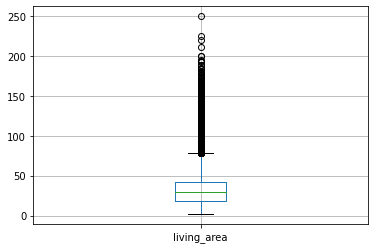

In [182]:
data.boxplot(column='living_area') #посмотрим, что там с жилой площадью
data['living_area'].describe().round()

После чистки аномальных значений по другим столбцам, мы видим, что границы по жилой площади уже сократились с 410 м² до 250 м². Невысокую плотность мы видим от 200 м², но их совсем немного, оставим как есть.

In [183]:
# выведем общую таблицу и сделаем по ней выводы
data.describe().round()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23437.0,23437.0,23437.0,23437.0,23437.0,23437.0,23437.0,23437.0,23437.0,23437.0,17928.0,23437.0,17950.0,7952.0,17950.0,8961.0,20291.0
mean,10.0,6210419.0,59.0,2.0,3.0,11.0,34.0,6.0,10.0,1.0,28805.0,17947.0,1.0,491.0,1.0,519.0,180.0
std,6.0,6844179.0,30.0,1.0,0.0,7.0,19.0,5.0,5.0,1.0,12652.0,10139.0,1.0,342.0,1.0,278.0,219.0
min,0.0,430000.0,12.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,18.0,2.0,7.0,0.0,18539.0,10982.0,0.0,288.0,0.0,295.0,45.0
50%,9.0,4600000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,0.0,26769.0,14978.0,0.0,455.0,0.0,503.0,95.0
75%,14.0,6700000.0,69.0,3.0,3.0,16.0,42.0,8.0,11.0,1.0,37298.0,30308.0,1.0,612.0,1.0,732.0,230.0
max,50.0,190870000.0,300.0,10.0,6.0,36.0,250.0,33.0,50.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


**Вывод**

Мы почистили датафрейм от выбросов, оставили границы по стоимости объектов до 200 млн, общей площадью до 300 м², количество комнат до 10, убрали огромные кухни от 50 м², тем самым жилая площадь квартир в выборке сократилась до 250 м². Успешно разобрались с высотой потолков, преобразовали значения там, где это было возможно, удалили объекты, где встречались неправдоподобно высокие этажи.

**Добавим в таблицу новые столбцы со следующими параметрами:**

•	цена одного квадратного метра;

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

•	месяц публикации объявления;

•	год публикации объявления;

•	тип этажа квартиры (значения — «первый», «последний», «другой»);

•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [184]:
#добавляем столбец со стоимостью квадратного метра 
data['square_price'] = (data['last_price']/data['total_area']).round()

#добавляем столбцы дня недели, месяца, года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#создаем столбец с типом этажа с помощью функции
def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floors_type'] = data.apply(floors_type, axis=1)

#создаем столбец с расстоянием до центра города в км
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,city_name,days_exposition_missing_value,square_price,weekday,month,year,floors_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,Санкт-Петербург,True,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81.0,другой,False,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,Санкт-Петербург,False,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,234.0,424.0,Санкт-Петербург,False,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,Санкт-Петербург,False,100000.0,1,6,2018,другой,8.0


### Исследовательский анализ данных.

#### Изучим следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления


**Площадь квартиры**

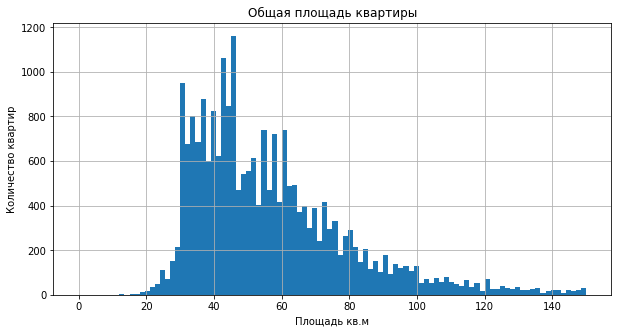

In [185]:
data['total_area'].hist(bins=100, figsize=(10,5), range=(0,150)) #Построим гистограмму методом hist ( ). 
plt.xlabel('Площадь кв.м')
plt.ylabel('Количество квартир')
plt.title('Общая площадь квартиры')
plt.show()

В нашей выборке мы оставили квартиры общей площадью до 300 м², на графике видно, что квартиры больше 120 м² встречаются редко. Пик приходится на квартиры площадью 30-46м², также часто встречаются квартиры от 50 до 65м².


**Жилая площадь квартиры**

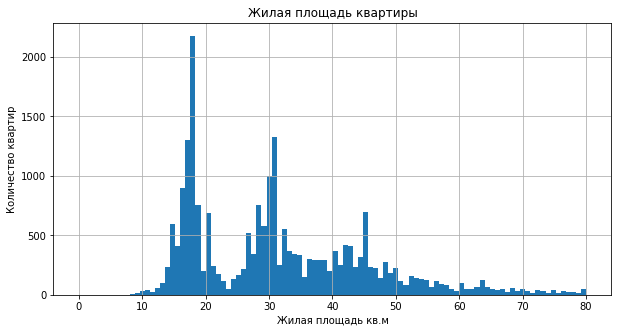

In [186]:
data['living_area'].hist(bins=100,figsize=(10,5),range=(0,80))
plt.xlabel('Жилая площадь кв.м')
plt.ylabel('Количество квартир')
plt.title('Жилая площадь квартиры')
plt.show()

Квартиры с жилой площадью более 65м² встречаются нечасто. Пик приходится на 16-18 м² и 28-32 м², также нередко встречаются квартиры с жилой площадью  44-45 м².


**Площадь кухни**

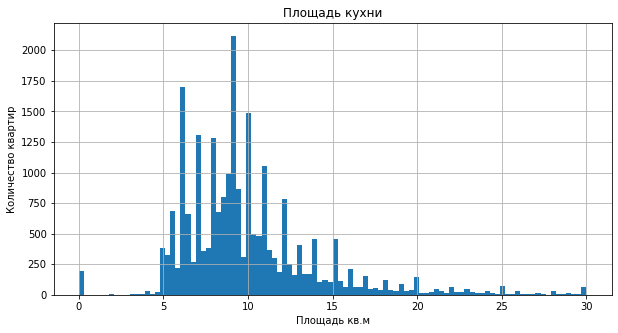

In [187]:
data['kitchen_area'].hist(bins=100,figsize=(10,5),range=(0,30))
plt.xlabel('Площадь кв.м')
plt.ylabel('Количество квартир')
plt.title('Площадь кухни')
plt.show()

Чаще всего в квартирах встречаются кухни около 8 м². В целом диапазон от 6 до 12 м² является популярным. Большие кухни от 20 м² редки. Также мы видим, что есть квартиры без кухни - это наши студии и квартиры свободной планировки.

**Цена объекта**

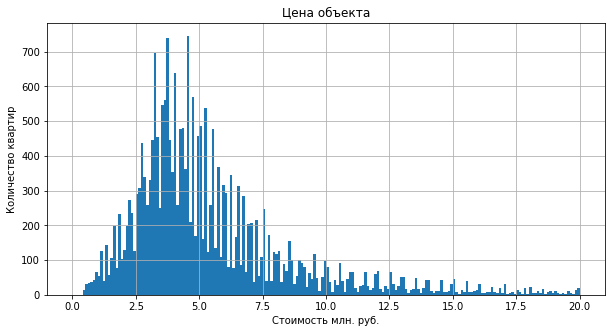

In [188]:
(data['last_price']/1000000).hist(bins=200,figsize=(10,5),range=(0,20))
plt.xlabel('Стоимость млн. руб.')
plt.ylabel('Количество квартир')
plt.title('Цена объекта')
plt.show()

Мы выдим, что большинство квартир продаются в диапазоне от 1 до 10 млн, далее начинается резкий спад, квартиры от 40 млн встречаются редко в нашей выборке. Пик стоимости приходится на диапазон от 3 до 5 млн, также часто встречаются квартиры стоимостью 6-8 млн.

**Количество комнат**

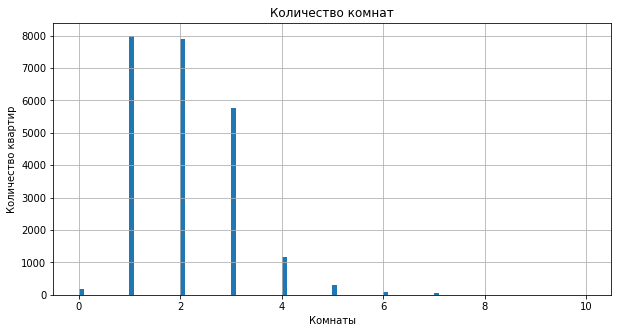

In [189]:
data['rooms'].hist(bins=100,figsize=(10,5))
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.title('Количество комнат')
plt.show()

Самые популярные, как и ожидалось, однокомнатные и двухкомнатные квартиры. Трехкомнатные тоже встречаются часто, четырехкомнатные уже реже, без комнат (куда попали студии и свободные планировки) и пятикомнатных совсем немного. Большие квартиры, от 6 комнат - единичны.

**Высота потолков**

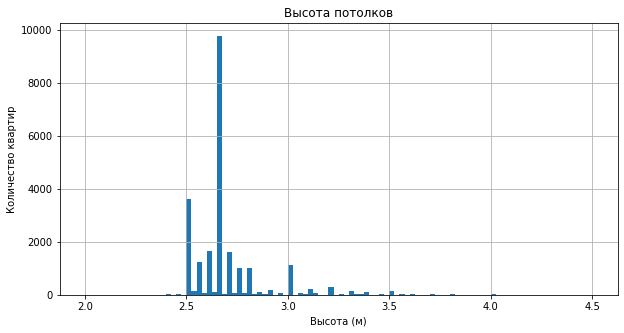

In [190]:
data['ceiling_height'].hist(bins=100,figsize=(10,5), range=(2,4.5))
plt.xlabel('Высота (м)')
plt.ylabel('Количество квартир')
plt.title('Высота потолков')
plt.show()

В исходных данных по этому столбцу было много пропусков, которые мы заполнили медианой, это и дало нам такой пик на высоте 2.65 м. Чаще всего в квартирах встречаются потолки от 2.5 до 3 м.

**Этаж квартиры**

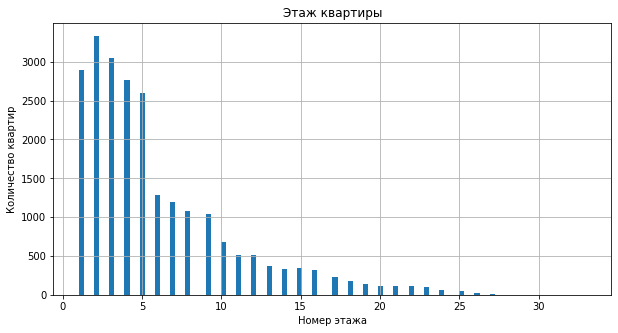

In [191]:
data['floor'].hist(bins=100,figsize=(10,5))
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.title('Этаж квартиры')
plt.show()

Продаваемые квартиры чаще всего располагаются с 1 по 5 этаж, также часто встречаются 6-9 этаж, дальще идет плавный спад.

**Тип этажа квартиры**

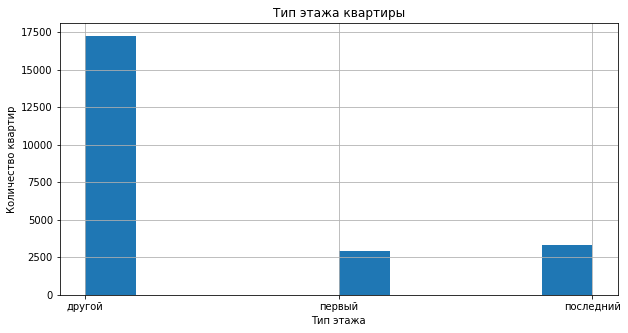

In [192]:
data['floors_type'].hist(bins=10,figsize=(10,5))
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.title('Тип этажа квартиры')
plt.show()

Подавляющее большинство квартир находятся не на первом и не на последнем этаже, соотношение первого и последнего, в свою очередь, имеет примерно одинаковое соотношение.

**Всего этажей в доме**

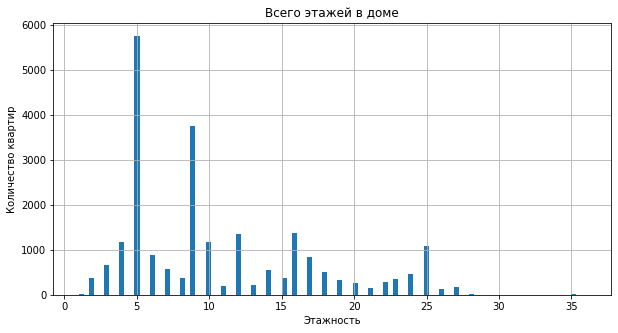

In [193]:
data['floors_total'].hist(bins=100,figsize=(10,5))
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.title('Всего этажей в доме')
plt.show()

Чаще всего встречаются пяти и девятиэтажные дома, а выше 25 этажей крайне редко.

**Расстояние до центра города**

In [194]:
data['city_name'].value_counts()

Санкт-Петербург    15543
другой              7894
Name: city_name, dtype: int64

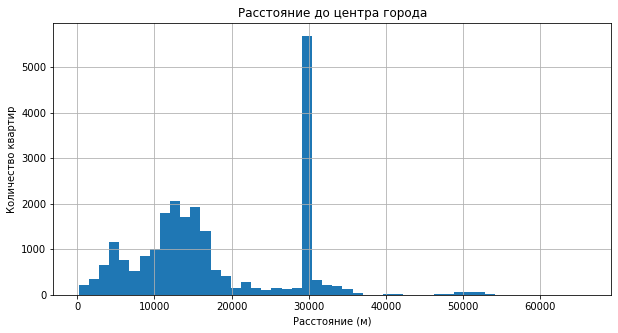

In [195]:
data['city_centers_nearest'].hist(bins=50,figsize=(10,5))
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество квартир')
plt.title('Расстояние до центра города')
plt.show()

В исходных данных мы имели около 20% пропусков по расстоянию до центра города, отделив квартиры в Петербурге и объединив все остальные населенные пункты, мы заполнили данные двумя медианами. Отсюда взялся пик на расстоянии в 30 км, это означает, что чаще всего пропуски в данных были для населенных пунктов, отличных от Санкт-Петербурга. В Санкт-Петербурге пик приходится на 10-16 км, также часто встречаются квартиры в продаже в радиусе 4-6 км от центра города.

**Расстояние до аэропорта**

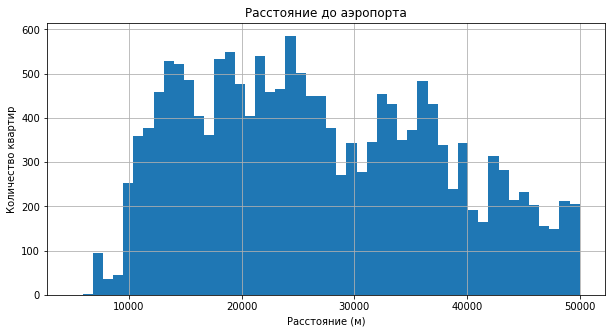

In [196]:
data['airports_nearest'].hist(bins=50,figsize=(10,5),range=(5000,50000))
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество квартир')
plt.title('Расстояние до аэропорта')
plt.show()

Большинство квартир распределены равномерно на расстоянии от 10 до 40 км от аэропорта.

**Расстояние до парка**

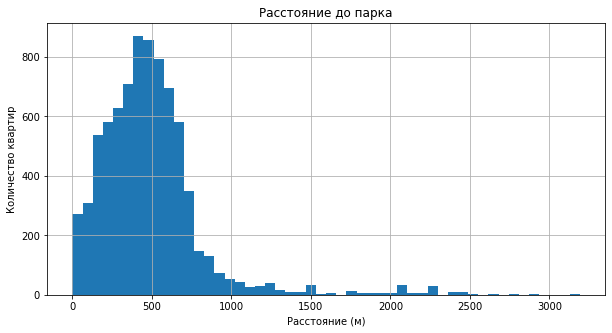

In [197]:
data['parks_nearest'].hist(bins=50,figsize=(10,5))
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество квартир')
plt.title('Расстояние до парка')
plt.show()

В более чем 70% объявлений по продаже квартир продавцы не указывают расстояние до ближайшего парка. По тем данным, что у нас есть, можно сделать вывод, что расстояние до парка указывается только если он есть в пешей доступности до 1 км.

**День публикации объявления**

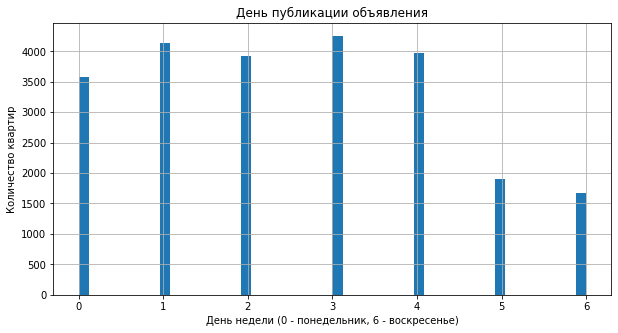

In [198]:
data['weekday'].hist(bins=50,figsize=(10,5))
plt.xlabel('День недели (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Количество квартир')
plt.title('День публикации объявления')
plt.show()

Объявления о продаже квартир примерно одинаково публикуются в будние дни, на выходных в два раза реже.

**Месяц публикации объявления**

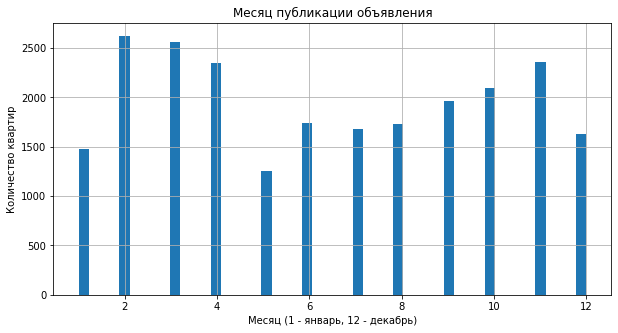

In [199]:
data['month'].hist(bins=50,figsize=(10,5))
plt.xlabel('Месяц (1 - январь, 12 - декабрь)')
plt.ylabel('Количество квартир')
plt.title('Месяц публикации объявления')
plt.show()

Самыми популярными месяцами публикации объявлений о продаже являются февраль и март, немного им уступают апрель и ноябрь. Реже всего продажей квартир занимаются в январе и мае, скорее всего это связано с длинными праздничными днями в эти месяцы.

#### Изучим, как быстро продаются квартиры.

Построим гистограмму по столбцу days_exposition и посмотрим, сколько дней было размещено каждое объявление.
Вычислим среднее значение и медиану.

In [200]:
data['days_exposition'].describe()#вызовем метод describe() и посмотрим разброс, медиана будет равна значению = 50%

count    20291.000000
mean       180.276182
std        219.276871
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [201]:
print('В среднем для продажи квартиры требуется', data['days_exposition'].mean().astype('int'), 'дней') #считаем среднее значение

В среднем для продажи квартиры требуется 180 дней


<AxesSubplot:>

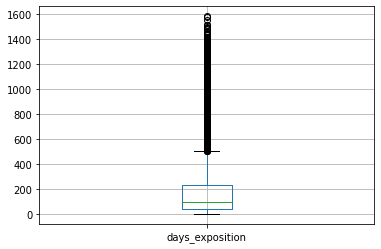

In [202]:
data.boxplot(column='days_exposition') #построим диаграмму размаха для наглядности

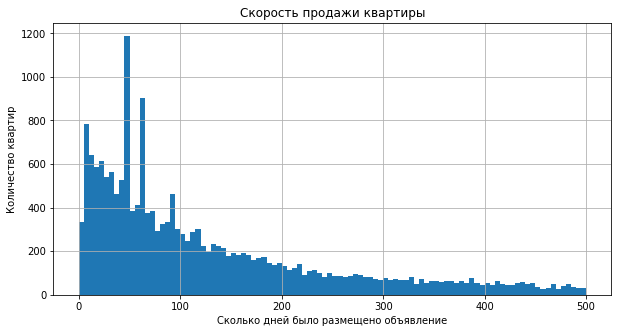

In [203]:
#построим гистограмму
data['days_exposition'].hist(bins=100,figsize=(10,5),range=(0,500))
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество квартир')
plt.title('Скорость продажи квартиры')
plt.show()

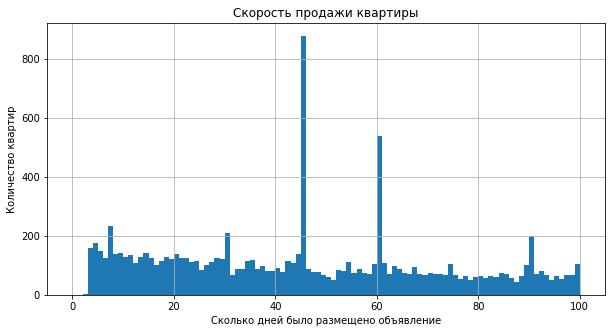

In [204]:
#сделаем нагляднее, что лучше рассмотреть пики
data['days_exposition'].hist(bins=100,figsize=(10,5),range=(0,100))
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество квартир')
plt.title('Скорость продажи квартиры')
plt.show()

Разброс в скорости продажи квартир от 1 дня до 1580 дней (это больше, чем 4 года).
Медиана составляет 95 дней, то есть ровно половина квартир продается быстрее этого срока, а вторая половина дольше, при этом среднее значение скорости продажи - 180 дней, такая разница в этих параметрах обусловлена большим значением стандартного отклонения в данных - 219 дней. Мы можем сделать вывод, что скорость продажи квартиры - максимально индивидуальный показатель. Большая часть квартир продается в срок от 1 до 5 месяцев. 
На скорость продажи может влиять множество факторов : стоимость квартиры, готов ли продавец к торгу (если он не торопится, то квартира может продаваться и год и два),расположение и инфраструктура района. Необычно быстрыми продажами мы можем назвать те, которые случились в первые дни после публикации объявления, скорее всего это квартиры по сниженной цене для максимально срочной продажи или объявления были опубликованы по ошибке и были сразу удалены. 
Среди очень долгих объявлений о продаже, которые опубликованы 2-4 года назад, скорее всего есть те, которые просто забыли удалить вовремя, то есть они могут быть давно неактуальными.
Мы видим пики на 7, 30, 45 (особенно высокое количество), 60, 90 днях, скорее всего это связано с правилами публикации объявлений, возможно, они снимаются автоматически в эти сроки. 

#### Что влияет на общую стоимость объекта?

Изучим, зависит ли цена от следующих факторов:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией будем использовать сводные таблицы. Также посчитаем корреляцию для количественных переменных.


**Корреляция стоимости и общей площади квартиры.**

Коэффицент корреляции равен: 0.7194142579716807


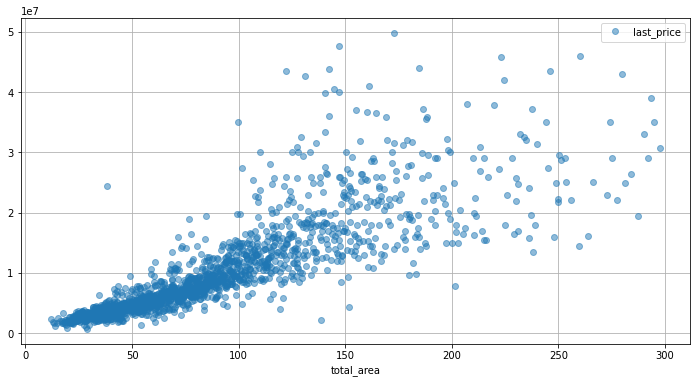

In [205]:
#строим график зависимости стоимости квартиры от ее площади, перед этим создаем сводную таблицу методом pivot_table()

(data
     .query('last_price < 50000000') #ограничим стоимость до 50 млн для наглядности
     .pivot_table(index='total_area', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o',alpha=0.5)
)
#считаем коэффицент корреляции Пирсона
print('Коэффицент корреляции равен:', data['last_price'].corr(data['total_area']))

Мы рассчитали корреляцию и видим прямую зависимость стоимости объекта и его площади, чем больше площадь, тем выше стоимость. Однако мы видим, что такая логика актуальна в большей степени для квартир до 100 м², далее мы видим рассеяние, така как квартиры большой площади уже нестандартный вариант и на стоимость могут влиять сильнее другие факторы, например, престижность района, ремонт, год постройки и класс дома и тд.

**Корреляция стоимости и жилой площади квартиры.**

Коэффицент корреляции равен: 0.619850451725671


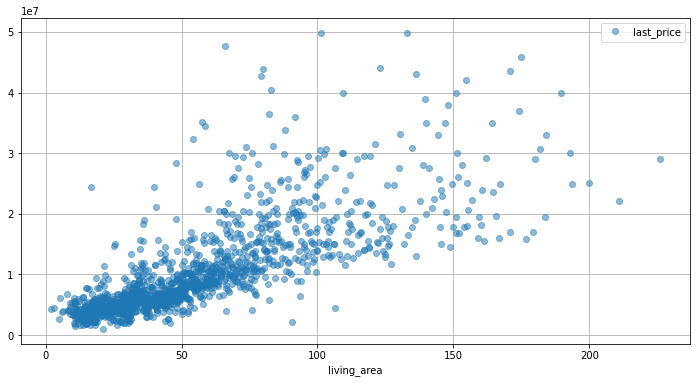

In [206]:
#строим график зависимости стоимости квартиры от ее жилой площади, перед этим создаем сводную таблицу методом pivot_table()

(data
     .query('last_price < 50000000')
     .pivot_table(index='living_area', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o',alpha=0.5)
)
#считаем коэффицент корреляции Пирсона
print('Коэффицент корреляции равен:', data['last_price'].corr(data['living_area']))

На графике видно, что зависимость стоимости объекта от жилой площади квартиры тоже велика, но коэффицент корреляции уже ниже, чем по общей площади. Рассеяние начинается на 70 м², в просторных квартирах может быть большая площадь кухни, коридоров, санузлов, а не только жилой площади комнат.

**Корреляция стоимости квартиры и площади кухни.**

Коэффицент корреляции равен: 0.4983603765008025


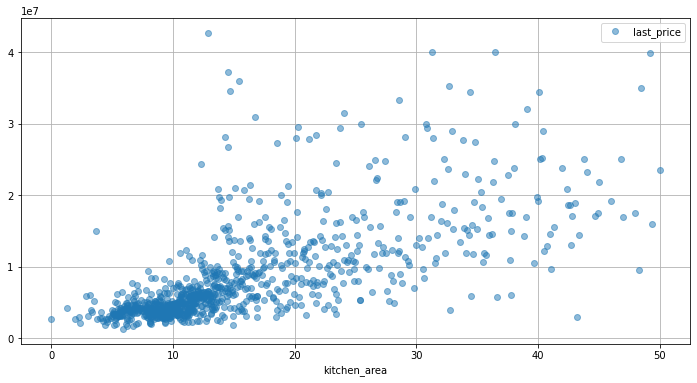

In [207]:
#строим график зависимости стоимости квартиры от площади кухни, перед этим создаем сводную таблицу методом pivot_table()

(data
     .query('last_price < 50000000 and kitchen_area < 60')
     .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o',alpha=0.5)
)
#считаем коэффицент корреляции Пирсона
print('Коэффицент корреляции равен:', data['last_price'].corr(data['kitchen_area']))

От площади кухни стоимость квартиры зависит еще меньше, хотя зависимость и существует, это видно по коэффиценнту корреляции, но скорее всего в больших квартирах просто чаще делают просторные кухни, чем в маленьких однушках или двушках.

**Корреляция стоимости квартиры и количества комнат.**

Коэффицент корреляции равен: 0.4308412932636443


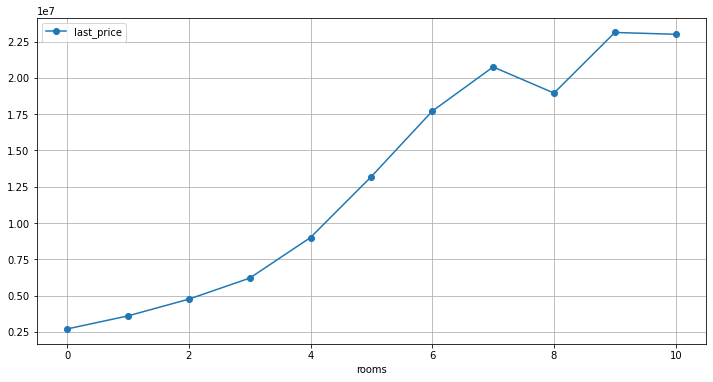

In [208]:
#строим график зависимости стоимости квартиры от количества комнат, перед этим создаем сводную таблицу методом pivot_table()

(data
     .pivot_table(index='rooms', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o-')
)
#считаем коэффицент корреляции Пирсона
print('Коэффицент корреляции равен:', data['last_price'].corr(data['rooms']))

В целом на графике видно, что стоимость квартиры обычно зависит от числа комнат и это логично, ведь зачастую чем больше комнат, тем больше метраж квартиры, но это не всегда так. Случается, что маленькие двухкомнатные квартиры меньше по метражу, чем большие однокомнатные. Поэтому зависимость есть (чем больше комнат, тем дороже квартира), но она не так явно прослеживается, как с площадью.

**Зависисмость стоимости квартиры от типа этажа.**

<AxesSubplot:xlabel='floors_type'>

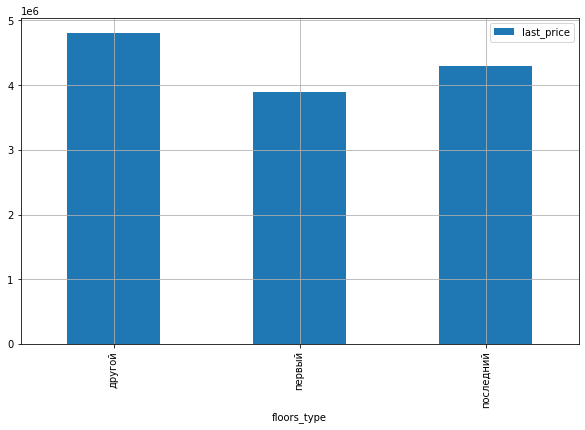

In [209]:
#строим график зависимости стоимости квартиры от этажа, на котором расположена квартира (первый, последний, другой) перед этим создаем сводную таблицу методом pivot_table()
(data
     .pivot_table(index='floors_type', values='last_price', aggfunc='median')
     .plot(kind='bar', grid=True, figsize=(10,6))
)

Дешевле всего стоят квартиры на первом этаже, их сложнее продать (прохожие могут заглядывать в окна, ворам залезть проще и тд), поэтому на них делают дисконт, квартиры на последнем этаже тоже уступают по стоимости остальным, но уже меньше, у таких квартир тоже бывают свои нюансы (например, протечка крыши, высота потолков), это не всем покупателям может понравиться.

**Зависимость стоимости квартиры от дня недели публикации объявления.**

<AxesSubplot:xlabel='weekday'>

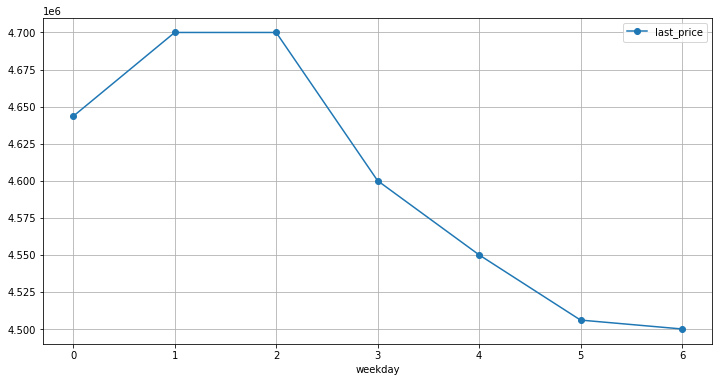

In [210]:
#строим график зависимости стоимости квартиры от дня недели публикации объявления, перед этим создаем сводную таблицу методом pivot_table()

(data
     .pivot_table(index='weekday', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o-')
)

Разница медианной стоимости квартир в зависимости от дня публикации объявления совсем незначительна, но все же чуть дороже квартиры, которые выставляют на продажу в начале недели.

**Зависимость стоимости квартиры от месяца публикации объявления.**

<AxesSubplot:xlabel='month'>

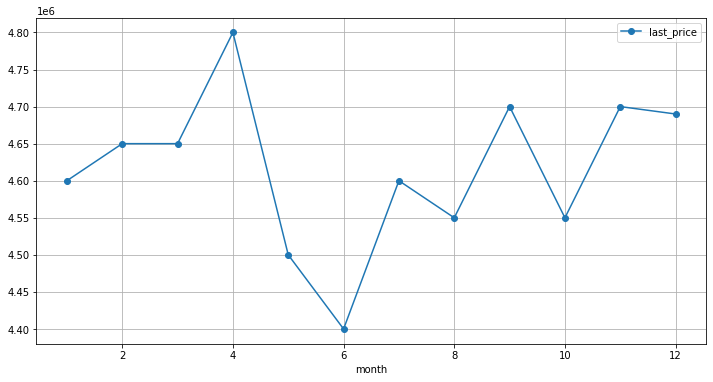

In [211]:
#строим график зависимости стоимости квартиры от месяца публикации объявления, перед этим создаем сводную таблицу методом pivot_table()

(data
     .pivot_table(index='month', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o-')
)

Месяц продажи квартир тоже незначительно влияет на их полную стоимость, но чуть ниже по стоимости недвижимость в июне и мае.

**Зависимость стоимости квартиры от года публикации объявления.**

<AxesSubplot:xlabel='year'>

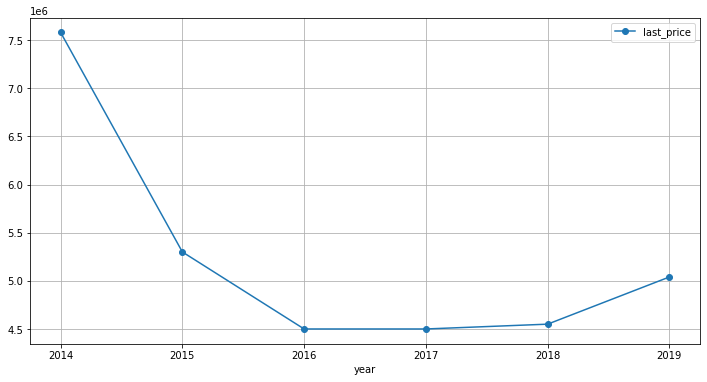

In [212]:
#строим график зависимости стоимости квартиры от года публикации объявления, перед этим создаем сводную таблицу методом pivot_table()

(data
     .pivot_table(index='year', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(12,6),style='o-')
)

Построив график по году публикации объявлений о продаже квартир, мы видим удорожание в 2014 году (это было связано с изменением курса валют, экономичесикими и политическими факторами), в 2015 начался спад, с 2016 по 2018 цены стабилизировались, с 2019 опять начался рост цен.

**Вывод:**

Значительнее всего на стоимость квартиры влияет общая и жилая площадь квартиры, площадь кухни и количество комнат уже в меньшей степени. Квартиры на первом и последнем этаже продают с небольшим дисконтом по стоимости. День и месяц публикации объявления практически не влияет на стоимость квартиры. Что касается года продажи квартиры, тут большое значение имеют экономические и политические факторы, чем стабильнее ситуация в стране, тем меньше инфляция и стабильнее цены на все, в том числе на недвижимость. 

#### Цена квадратного метра по населенным пунктам.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

**Топ-10 населенных пунктов:**

In [213]:
data['locality_name'].value_counts().head(10)#сделаем сортировку по населенным пунктам с наибольшим количеством объявлений

Санкт-Петербург      15543
Мурино                 586
Кудрово                469
поселок Шушары         439
Всеволожск             397
Пушкин                 364
Колпино                337
поселок Парголово      327
Гатчина                307
Выборг                 235
Name: locality_name, dtype: int64

In [214]:
(data
    .groupby('locality_name').agg({'total_images' : 'count', 'square_price': 'mean'}).astype('int')
    .sort_values(by='total_images', ascending=False).head(10)
)

,total_images,square_price
locality_name,,
Санкт-Петербург,15543,113819
Мурино,586,86041
Кудрово,469,95261
поселок Шушары,439,78551
Всеволожск,397,68719
Пушкин,364,102929
Колпино,337,75333
поселок Парголово,327,90175
Гатчина,307,68746


Итак, мы посмотрели Топ-10 населенных пунктов, где больше всего продается квартир. 
Безусловный лидер - Санкт-Петербург, за ними идет Мурино и Кудрово (это относительно новые районы в непосредственной близости к черте города, с очень плотной застройкой). 
По стоимости квадратного метра из этой десятки также выходит в лидеры Санкт-Петербург - почти 114 тыс за квадратный метр, дешевле всего обойдется квартира в Выборге (он удален от Санкт-Петербурга дальше остальных населенных пунктов) - 58 тыс за квадрат, а также в Гатчине и Всеволожске - по 68 тыс за квадратный метр.

#### Зависимость стоимости объекта от расстояния до центра города.

Ранее мы посчитали расстояние до центра города в километрах и добавили данные в столбец city_centers_nearest_km. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра, чтобы понять, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='city_centers_nearest_km'>

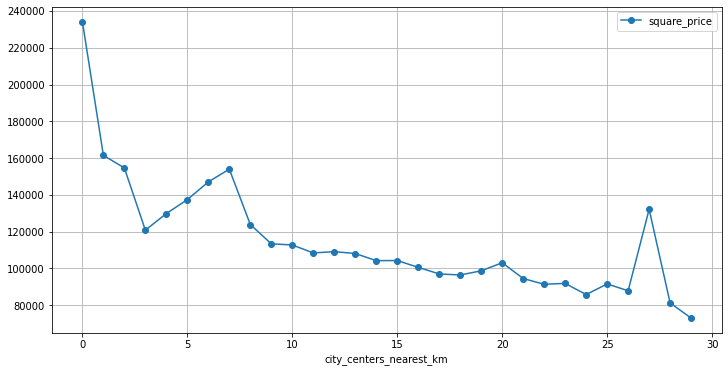

In [215]:
(data
    .query('locality_name == "Санкт-Петербург"') #сделаем срез данных по Санкт-Петербургу
    .pivot_table(index='city_centers_nearest_km',values='square_price') #создадим сводную таблицу зависимости стоимости квадратного метра от расстояния до центра города
    .plot(grid=True, figsize=(12,6),style='o-') #построим график для наглядности
)

Что касается зависимости стоимости квадратного метра от удаленности от центра города, то мы видим, что в центре цена за квадрат значительно выше. За этим следует резкий спад по стоимости почти в два раза, на расстоянии 3-5 км от центра (обычно там располагаются промзоны, где нет особой инфраструктуры, ты вроде живешь недалеко от центра, но район не очень престижный). На расстоянии 6-7 км виден опять подъем, на это влияют престижные районы города, которые там располагаются (например, недвижимость на Крестовском острове может стоить дороже, чем в центре, что влияет на среднюю стоимость на этом расстоянии). Дальше мы видим постепенное снижение цены (чем дальше от центра, тем дешевле) и в районе 26 км от центра города опять увеличение стоимости, на этот показатель влияют элитные коттеджные поселки, которые там распологаются (например, Репино, Комарово, город Зеленогорск).

### Общий вывод

Мы обработали и изучили полученный архив данных, а именно: поработали с пропущенными значениями там, где это необходимо, изменили типы данных, устранили неявные дубликаты в названии населенных пунктов, заменили или удалили аномальные значения, предварительно обосновав свои действия. 
Также посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, расстояние до центра города в км, добавили категории по этажам квартир. 
Изучили следующие параметры:  общая и жилая площадь, площадь кухни, число комнат, цена квартиры, количество этажей, типы этажей,  высота потолков, расстояние до центра, парка, аэропорта.

**Факторы, влияющие на стоимость.**
Значительнее всего на стоимость квартиры влияет общая и жилая площадь квартиры, площадь кухни и количество комнат уже в меньшей степени. 
Квартиры на первом и последнем этаже продают с небольшим дисконтом по стоимости. 
День и месяц публикации объявления практически не влияет на стоимость. 
Что касается года продажи квартиры, тут большое значение имеют экономические и политические факторы, чем стабильнее ситуация в стране, тем меньше инфляция и стабильнее цены на все, в том числе на недвижимость.
Удаленность от центра города является важным фактором, который влияет на ценовую политику. Квартиры в центре Санкт-Петербурга стоят значительно дороже, чем в спальных районах, но есть и престижные районы города, где стоимость квадратного метра высокая, но центром города они не являются. 

**Сроки продажи квартиры.**
Разброс в скорости продажи квартир от 1 дня до 1580 дней (это больше, чем 4 года). Большая часть квартир продается в срок до 3-4 месяцев.
Необычно быстрыми продажами мы можем назвать те, которые случились в первые дни после публикации объявления, скорее всего это квартиры по сниженной цене для максимально срочной продажи или ошибочно выставленные. 
Среди очень долгих объявлений о продаже, которые опубликованы 2-4 года назад, скорее всего есть те, которые просто забыли удалить вовремя, то есть эти данные могут быть неактуальны.
Мы видим пики продаж на 7, 30, 45 (особенно высокое количество), 60, 90 день, скорее всего это связано с правилами публикации объявлений, возможно, они снимаются автоматически в эти сроки.

**Топ-10.**

Рейтинг населенных пунктов по количеству объявлений по продаже квартир выглядит следующим образом:

- Санкт-Петербург      
- Мурино                 
- Кудрово                
- поселок Шушары         
- Всеволожск             
- Пушкин                 
- Колпино                
- поселок Парголово      
- Гатчина                
- Выборг   

Безусловным лидером является Санкт-Петербург, за ними идут Мурино и Кудрово (это относительно новые районы в непосредственной близости к черте города, с очень плотной застройкой). 
По стоимости квадратного метра из этой десятки также выходит в лидеры Санкт-Петербург - почти 114 тыс за квадратный метр, дешевле всего обойдется квартира в Выборге (он удален от Санкт-Петербурга дальше остальных населенных пунктов) - 58 тыс за квадрат, а также в Гатчине и Всеволожске - по 68 тыс за квадратный метр.

**Рекомендации для площадки Яндекс-Недвижимость.**

- уделить внимание системе автоматической обработки картографических значений. Мы видим большое количество пропущенных значений в следующих параметрах: расстояние до центра, аэропорта, ближайшего парка и водоёма

- добавить сегментацию рынка недвижимости, чтобы была возможность анализировать данные для каждой категории по отдельности (категоризировать объекты по уровню комфорта и дате постройки). Возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному

- поработать над системой публикации объявлений, чтобы автоматическое снятие объявления с продажи не приравнивалось к фактической продаже квартиры, т.к. из-за этого возникают неправдоподобные пики продаж через определенное количество дней 